In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 12s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

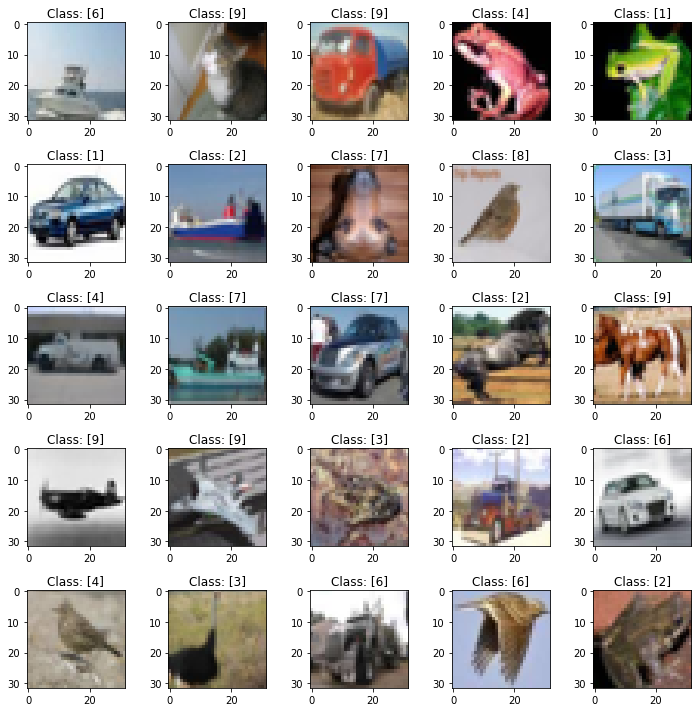

In [5]:
fig = plt.figure(figsize=(10, 10))
for idx in range(25):
  plt.subplot(5, 5, idx+1)
  plt.imshow(X_train[idx+100], cmap='gray', interpolation='none')
  plt.title('Class: {}'.format(y_train[idx]))

plt.tight_layout()

In [3]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(-1, img_rows, img_cols, num_channels)
X_test = X_test.reshape(-1, img_rows, img_cols, num_channels)

input_shape = (img_rows, img_cols, num_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [11]:
y_train.shape

(50000, 1)

In [12]:
# musimy zmienić, tak abyśmy mieli jeden wymiar

y_train = y_train.reshape(-1).shape

(50000,)

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)

if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [15]:
y_train.shape, y_test.shape, num_classes # sprawdzenie czy mamy odpowiednie wymiary

((50000, 10), (10000, 10), 10)

In [0]:
# zaczynamy definiować sieć

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),


    Flatten(),

    Dense(1024, activation='relu'),    
    Dropout(0.25),
    Dense(num_classes, activation='softmax')

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [13]:
# trenowanie modelu

model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=2,
    validation_data=(X_test, y_test)   
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.8610 - acc: 0.2977 - val_loss: 1.4880 - val_acc: 0.4547
Epoch 2/10
 - 6s - loss: 1.4398 - acc: 0.4754 - val_loss: 1.2627 - val_acc: 0.5439
Epoch 3/10
 - 6s - loss: 1.2712 - acc: 0.5429 - val_loss: 1.1312 - val_acc: 0.5980
Epoch 4/10
 - 6s - loss: 1.1640 - acc: 0.5862 - val_loss: 1.0532 - val_acc: 0.6289
Epoch 5/10
 - 6s - loss: 1.0863 - acc: 0.6135 - val_loss: 0.9842 - val_acc: 0.6568
Epoch 6/10
 - 5s - loss: 1.0291 - acc: 0.6384 - val_loss: 0.9504 - val_acc: 0.6712
Epoch 7/10
 - 5s - loss: 0.9841 - acc: 0.6533 - val_loss: 0.9416 - val_acc: 0.6679
Epoch 8/10
 - 6s - loss: 0.9407 - acc: 0.6678 - val_loss: 0.8582 - val_acc: 0.7015
Epoch 9/10
 - 6s - loss: 0.9035 - acc: 0.6827 - val_loss: 0.8573 - val_acc: 0.7020
Epoch 10/10
 - 6s - loss: 0.8810 - acc: 0.6944 - val_loss: 0.8502 - val_acc: 0.7099


In [14]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 104us/step


[0.8501769961357116, 0.7099]